In [5]:
import sys
import os

# Add the build directory to Python path
build_dir = os.path.abspath('../lib')
sys.path.insert(0, build_dir)

data_dir = os.path.abspath('../data')
sys.path.insert(0, data_dir)

import pandas as pd
import numpy as np

import sorters
import probes

import list_generators as lg

In [6]:
sorts = sorters.list_sorters()
print(sorts)

['adaptive_shivers_sort', 'cartesian_tree_sort', 'counting_sort', 'heap_sort', 'insertion_sort', 'mel_sort', 'merge_sort', 'poplar_sort', 'quick_sort', 'quick_merge_sort', 'ska_sort', 'slab_sort', 'smooth_sort', 'spin_sort', 'splay_sort', 'spread_sort', 'std_sort', 'tim_sort']


In [7]:
import data.list_generators as lg

sizes = []
for i in range (10, 100000, 10000):
    sizes.append(i)

print(sizes)

[10, 10010, 20010, 30010, 40010, 50010, 60010, 70010, 80010, 90010]


In [8]:
dataset = []
for size in sizes:
    dataset.append(lg.randomize_list(lg.generate_list(size)))

In [9]:
from tqdm import tqdm

times = []
for sort in tqdm(sorts, desc="Sorters"):
    sort_time = []
    for arr in tqdm(dataset, desc=f"Benchmarking {sort}", leave=False):
        sort_time.append(sorters.benchmark_sorter(sort, arr))
    times.append(sort_time)

print(times)

Sorters: 100%|██████████| 18/18 [00:02<00:00,  7.48it/s]

[[0.000541, 0.473917, 0.87975, 1.519042, 1.968542, 2.626625, 3.402958, 3.679125, 4.230583, 4.895417], [0.005625, 0.470583, 1.028958, 1.70275, 2.4345, 3.089625, 4.62225, 4.389416, 5.20425, 6.687166], [0.000375, 0.015625, 0.042417, 0.051792, 0.08625, 0.098083, 0.109334, 0.147625, 0.155959, 0.176833], [0.000458, 0.232875, 0.495667, 0.777208, 1.193583, 1.520459, 1.8075, 2.024583, 2.425875, 2.734625], [0.000208, 6.580292, 25.9895, 58.912917, 103.093833, 158.249333, 234.532625, 323.24275, 411.246583, 521.366416], [0.00925, 0.596125, 1.538291, 2.494167, 2.460958, 3.390959, 4.437459, 5.422917, 6.626833, 7.196584], [0.00025, 0.279583, 0.603, 0.945875, 1.288125, 1.707625, 2.307459, 2.556917, 2.773792, 3.206125], [0.017, 0.381417, 0.805167, 1.345, 1.898125, 2.516458, 3.121209, 3.72775, 4.734041, 4.962625], [0.000375, 0.298375, 0.641167, 0.98725, 1.415041, 1.867333, 2.384584, 2.535167, 3.026875, 3.472542], [0.000334, 0.356584, 0.748333, 1.183708, 1.516916, 1.927417, 2.370916, 2.811916, 3.546041, 3

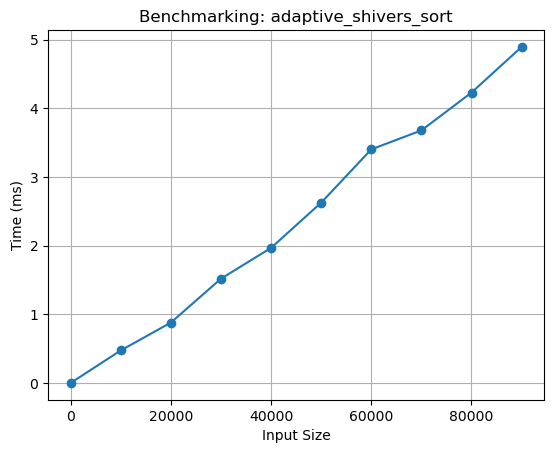

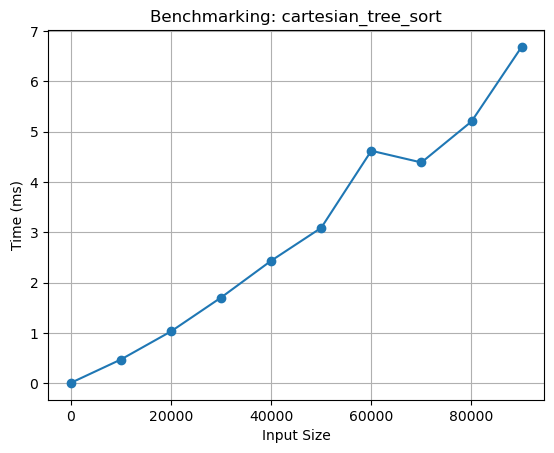

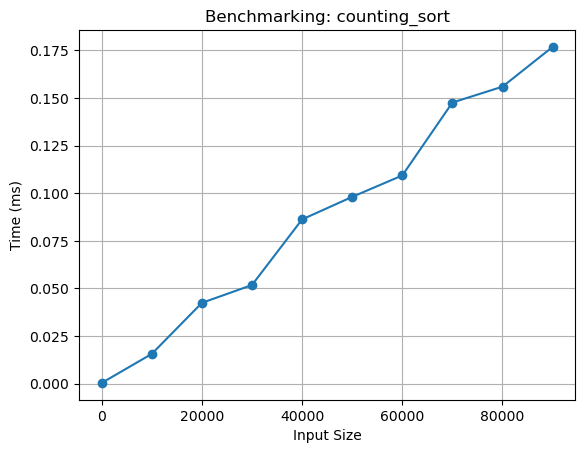

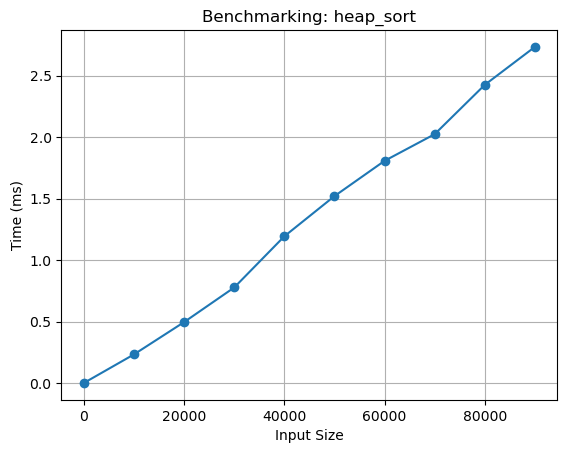

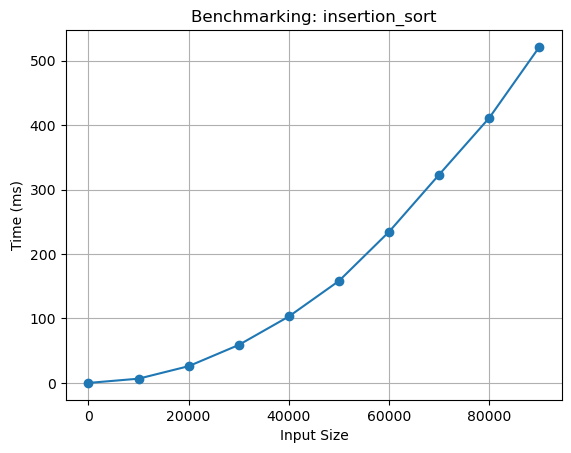

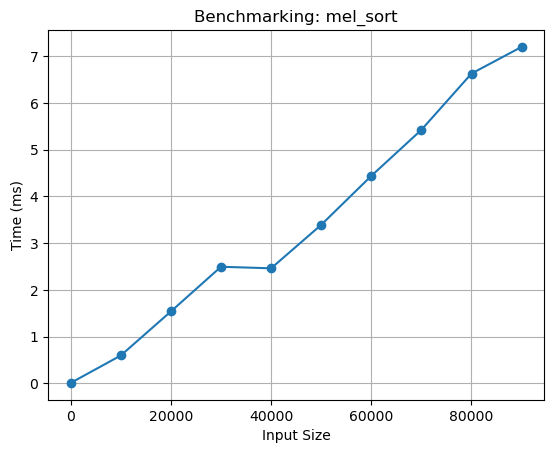

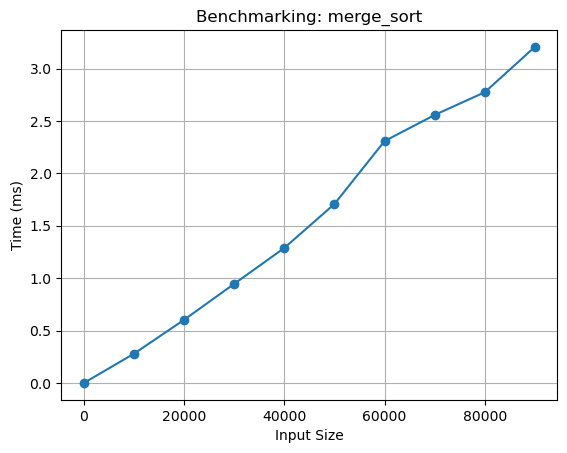

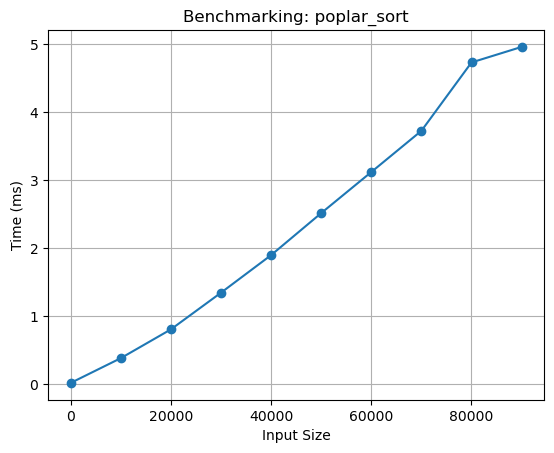

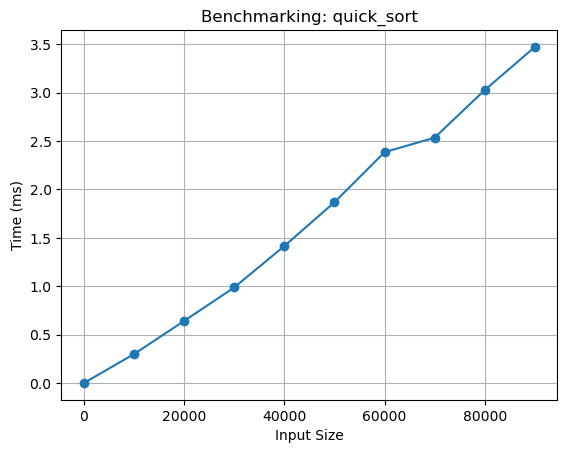

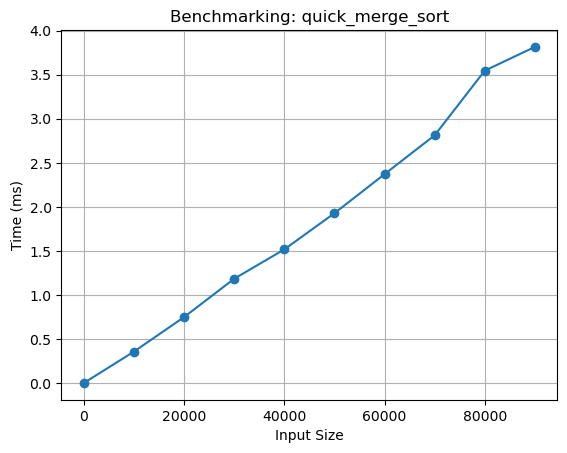

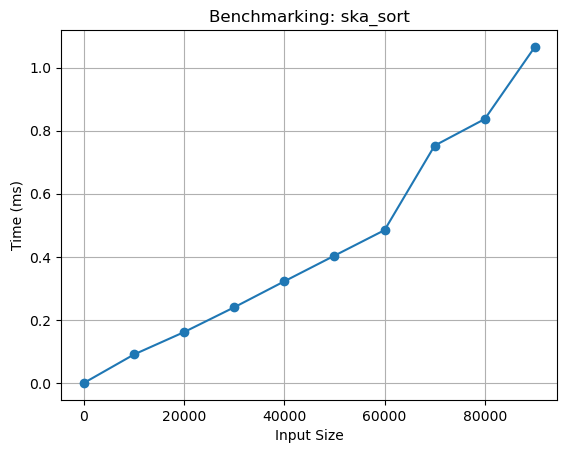

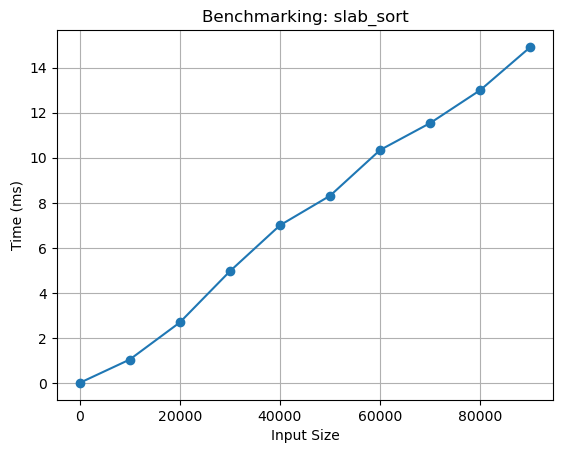

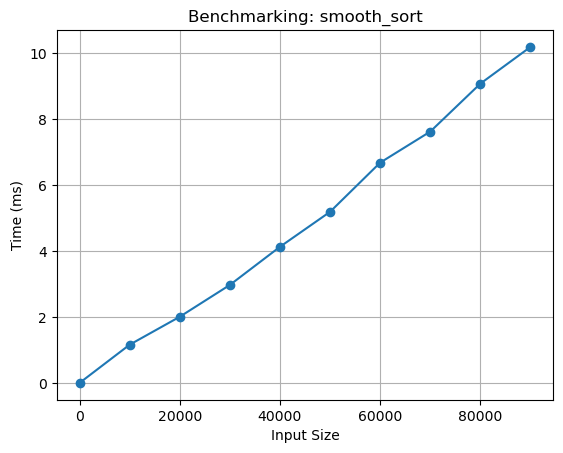

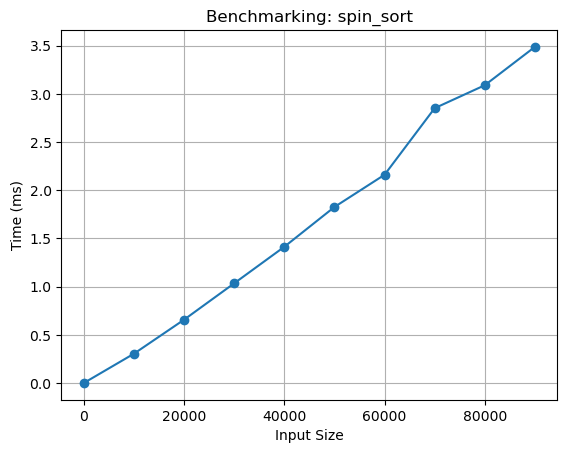

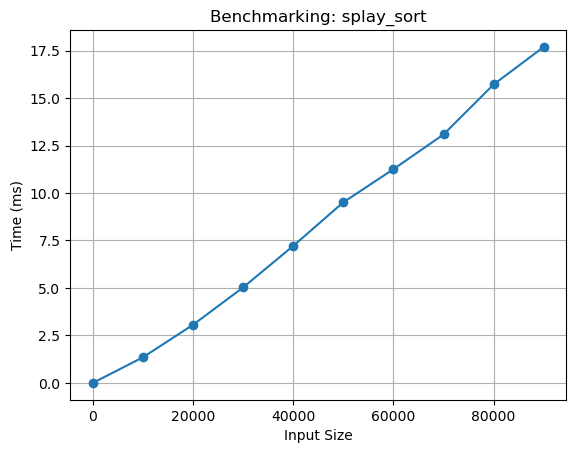

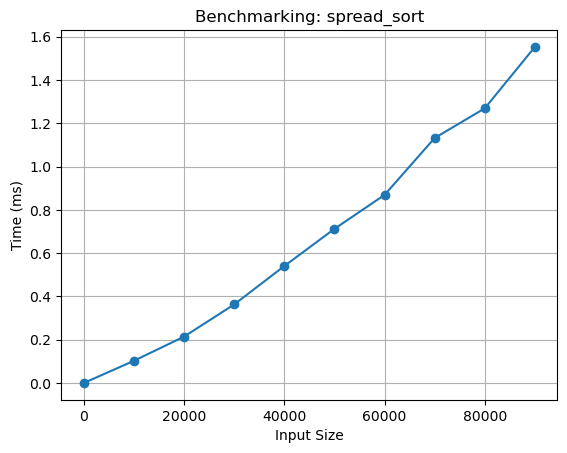

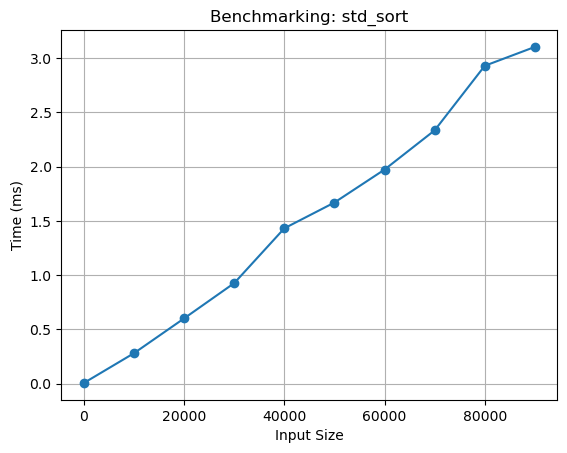

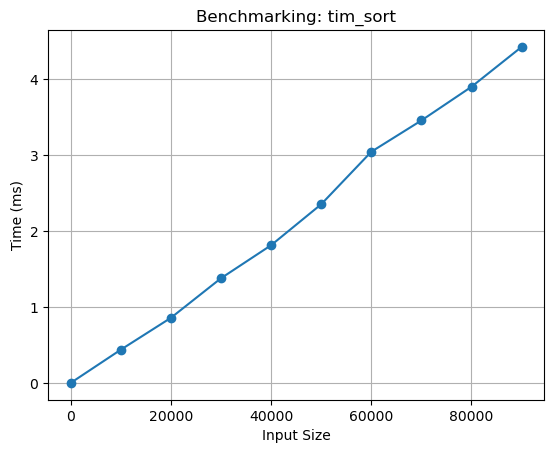

adaptive_shivers_sort: 2.3677 ms
cartesian_tree_sort: 2.9635 ms
counting_sort: 0.0884 ms
heap_sort: 1.3213 ms
insertion_sort: 184.3214 ms
mel_sort: 3.4174 ms
merge_sort: 1.5669 ms
poplar_sort: 2.3509 ms
quick_sort: 1.6629 ms
quick_merge_sort: 1.8278 ms
ska_sort: 0.4359 ms
slab_sort: 7.3866 ms
smooth_sort: 4.8987 ms
spin_sort: 1.6827 ms
splay_sort: 8.3915 ms
spread_sort: 0.6756 ms
std_sort: 1.5255 ms
tim_sort: 2.1677 ms


In [10]:
import matplotlib.pyplot as plt

for sort_name, sort_times in zip(sorts, times):
    plt.figure()  
    plt.plot(sizes, sort_times, marker='o')
    plt.xlabel("Input Size")
    plt.ylabel("Time (ms)")
    plt.title(f"Benchmarking: {sort_name}")
    plt.grid(True)
    plt.show()

for i in range(len(sorts)):
    print(f"{sorts[i]}: {np.mean(times[i]):.4f} ms")

In [11]:
import time

def benchmark_python_sort(arrays):
    total_time = 0.0
    for arr in arrays:
        arr_copy = arr.copy()

        start = time.perf_counter()
        arr_copy.sort()
        end = time.perf_counter()

        total_time += (end - start)
    return total_time * 1000

python_sort_time = benchmark_python_sort(dataset)
print(f"Python default sort benchmark: {python_sort_time:.4f} ms")

Python default sort benchmark: 46.5393 ms


In [12]:
def benchmark_numpy_sort_kind(arrays, kind='quicksort'):
    total_time = 0.0
    for arr in arrays:
        np_arr = np.array(arr)

        start = time.perf_counter()
        np.sort(np_arr, kind=kind)
        end = time.perf_counter()

        total_time += (end - start)
    return total_time * 1000  

kinds = ['quicksort', 'mergesort', 'heapsort', 'stable']

for kind in kinds:
    sort_time = benchmark_numpy_sort_kind(dataset, kind=kind)
    print(f"NumPy sort ({kind}): {sort_time:.4f} ms")

NumPy sort (quicksort): 17.5396 ms
NumPy sort (mergesort): 15.5969 ms
NumPy sort (heapsort): 13.1358 ms
NumPy sort (stable): 15.1561 ms
